In [45]:
# Import libraries

from fastai.tabular.all import *
from pandas.api.types import CategoricalDtype
import pandas as pd

In [46]:
# Import data
full_data_path = '/Users/emmetthintz/Documents/Computational-Biology/Data/GSE97154_Cleaned.csv'
full_data = pd.read_csv(full_data_path)

treated_data = full_data[full_data['Treatment'] == 1]

train_path = '/Users/emmetthintz/Documents/Computational-Biology/Predictive Data/filtered_train_data.csv'
test_path = '/Users/emmetthintz/Documents/Computational-Biology/Predictive Data/filtered_test_data.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df['Response'] = train_df['Response'].astype('category')

In [47]:
# Define categorical variables
cat_cols = []
cont_cols = [col for col in train_df.columns if col not in ['Participant ID', 'Response']]

# Define DataLoaders
dls = TabularDataLoaders.from_df(train_df, path=".", y_names="Response",
                                 cat_names=cat_cols, cont_names=cont_cols, procs=[Normalize],
                                 y_block=CategoryBlock(), # Explicitly specifying a classification task
                                 bs=64, valid_idx=list(range(len(train_df)-int(len(train_df)*0.2), len(train_df))))


# Check one batch of data
dls.show_batch()

,hsa-miR-1180-3p,hsa-miR-146a-5p,hsa-miR-425-3p,hsa-miR-24-3p,hsa-miR-3074-5p,hsa-miR-215-5p,hsa-miR-503-5p,Response
0,6.851387,5.676296,3.529446,5.422536,4.307064,6.131486,2.044044,1
1,6.949162,5.539283,4.316870,5.731944,4.731944,6.316888,1.409798,1
2,5.968298,6.330863,3.646393,5.423982,4.362610,5.482881,1.423847,1
3,6.563631,7.487278,5.051198,6.356038,5.008092,4.771093,3.285698,0
4,6.935189,8.005905,7.067026,7.432400,6.098201,3.928276,4.620117,1
5,7.428637,5.428645,4.428611,5.661294,4.691646,4.807149,1.107018,0
6,6.408287,6.277706,5.462739,6.029784,4.955778,5.638595,1.707966,1
7,6.532582,5.570038,3.454571,5.776499,4.808230,6.284644,0.284514,0
8,6.910913,6.273479,4.103581,5.714987,4.393073,5.840514,1.518535,1
9,6.751665,6.913727,6.319708,6.319708,5.083639,5.424687,3.176801,1


In [48]:
# Train the model

learn = tabular_learner(dls, layers=[200,100], metrics=accuracy)

SuggestedLRs(valley=0.0010000000474974513)

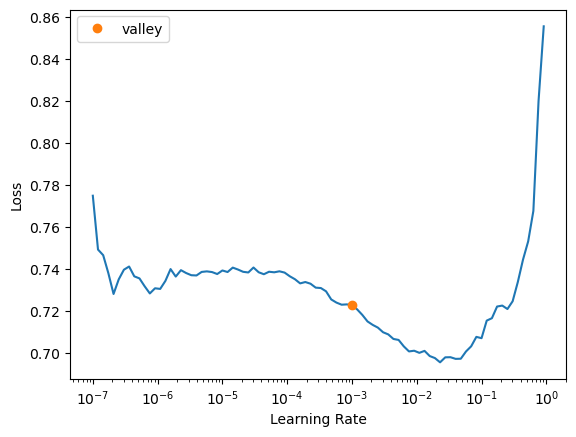

In [49]:
learn.lr_find()

In [50]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.751913,0.667020,0.673913,00:00
1,0.747465,0.655100,0.608696,00:00
2,0.737151,0.686278,0.641304,00:00
3,0.715220,0.677469,0.619565,00:00
4,0.699510,0.675172,0.641304,00:00


In [51]:
learn.show_results()

,hsa-miR-1180-3p,hsa-miR-146a-5p,hsa-miR-425-3p,hsa-miR-24-3p,hsa-miR-3074-5p,hsa-miR-215-5p,hsa-miR-503-5p,Response,Response_pred
0,-0.169357,0.042543,-0.816136,-0.065390,0.255773,1.685644,-0.462715,1.0,1.0
1,-1.331862,-1.199413,-1.025382,-1.096542,-0.752294,0.945181,-1.515272,1.0,1.0
2,0.214639,-0.212570,-0.427612,-0.038386,0.217516,-1.752881,0.486259,1.0,0.0
3,-0.384178,-0.400860,-0.503440,-0.623102,-0.769727,1.442522,-0.316845,0.0,1.0
4,0.130256,-1.382661,-1.085331,-1.541594,-0.979890,0.579055,-0.620856,1.0,1.0
5,-0.136718,-1.072855,-0.653969,-0.627710,-0.459829,0.312713,-1.205902,1.0,1.0
6,4.715331,-0.138241,2.121138,2.086364,2.264063,-2.685847,1.369427,1.0,1.0
7,3.483759,1.900607,1.612752,0.438497,0.435191,0.227099,0.932308,0.0,1.0
8,-1.038986,-1.240821,-1.078941,-0.837422,-0.887597,-0.454279,0.008509,1.0,1.0


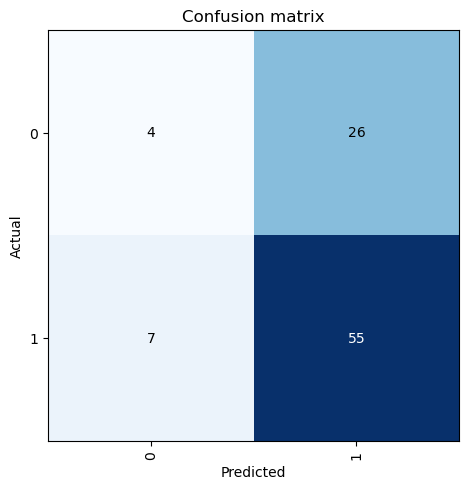

In [52]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [53]:
preds, targets = learn.get_preds(dl=dls.test_dl(test_df))

# Make Predictions

In [54]:
test_dl = dls.test_dl(test_df)

preds, _ = learn.get_preds(dl=test_dl)

In [55]:
class_preds = (preds[:, 1] > 0.5).int()

In [56]:
from sklearn.metrics import accuracy_score

actual_labels = test_df['Response'].to_numpy()
predicted_labels = class_preds.numpy()

accuracy = accuracy_score(actual_labels, predicted_labels)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.5961538461538461
